In [258]:
import pandas as pd


complaints = pd.read_csv('shared/complaints_25Nov21.csv')


print(complaints.head())

print(complaints.describe())


print(complaints.isnull().sum())


print(complaints['Consumer disputed?'].value_counts())





  Date received                  Product                   Sub-product  \
0    2016-10-26          Money transfers  International money transfer   
1    2015-03-27  Bank account or service    Other bank product/service   
2    2015-04-20  Bank account or service    Other bank product/service   
3    2013-04-29                 Mortgage   Conventional fixed mortgage   
4    2013-05-29                 Mortgage                Other mortgage   

                                      Issue Sub-issue  \
0                  Other transaction issues       NaN   
1   Account opening, closing, or management       NaN   
2  Making/receiving payments, sending money       NaN   
3  Application, originator, mortgage broker       NaN   
4  Loan modification,collection,foreclosure       NaN   

                        Consumer complaint narrative  \
0  To whom it concerns, I would like to file a fo...   
1  My name is XXXX XXXX XXXX and huband name is X...   
2  XXXX 2015 : I called to make a payment on

In [259]:
complaints.describe()
for col in ['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']:
    print(complaints[col].value_counts())


Product
Mortgage                   101680
Bank account or service     44594
Credit card                 42191
Debt collection              7861
Consumer Loan                5508
Student loan                 2866
Money transfers               869
Credit reporting              741
Prepaid card                  635
Other financial service       232
Payday loan                    83
Name: count, dtype: int64
Sub-product
Other mortgage                            44418
Checking account                          31880
Conventional fixed mortgage               27105
FHA mortgage                              11576
Conventional adjustable mortgage (ARM)     9960
Other bank product/service                 8525
Home equity loan or line of credit         5852
Credit card                                4059
Vehicle loan                               3079
Non-federal student loan                   2927
Savings account                            2528
VA mortgage                                1912
Inst

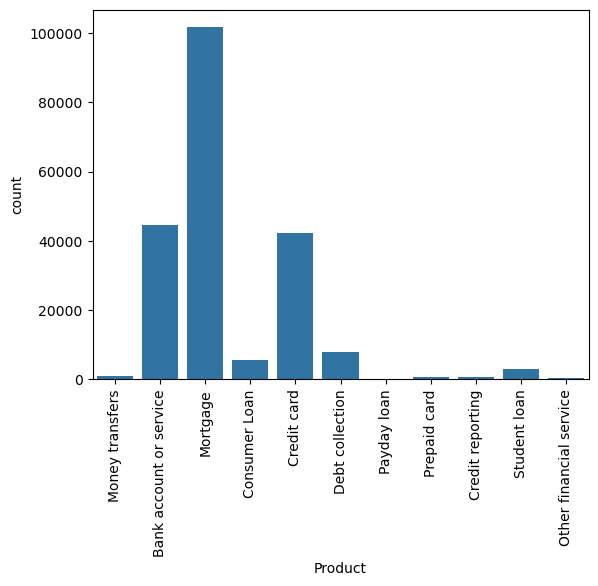

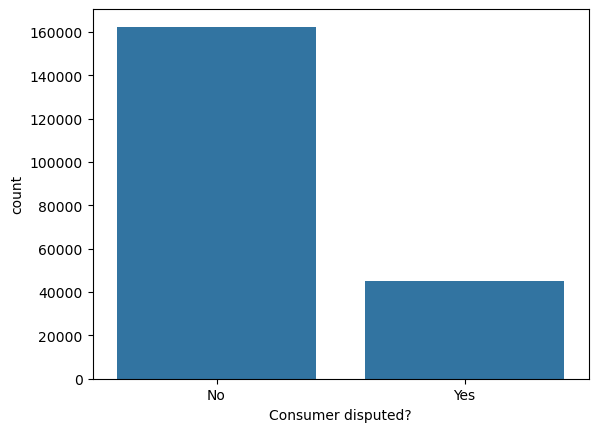

In [260]:
#1
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=complaints, x='Product')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=complaints, x='Consumer disputed?')
plt.show()


In [261]:
#2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = complaints[['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via', 'Company response to consumer', 'Timely response?']]


X = pd.get_dummies(X)


le = preprocessing.LabelEncoder()
y = le.fit_transform(complaints['Consumer disputed?'])  
print(dispute_proportion)



0.21586413200810575


In [262]:
#3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)



In [263]:
#4
import numpy as np

disputed_proportion = np.mean(y_train)
print(f"Proportion of disputed complaints in the training dataset: {disputed_proportion:.2f}")

if disputed_proportion < 0.30:
    print("The proportion of disputes is less than 30%, proceeding with undersampling.")
    from imblearn.under_sampling import RandomUnderSampler

    undersampler = RandomUnderSampler(random_state=123)

    X_train, y_train = undersampler.fit_resample(X_train, y_train)

    new_disputed_proportion = np.mean(y_train)
    print(f"New proportion of disputed complaints after undersampling: {new_disputed_proportion:.2f}")
else:
    print("The proportion of disputes is 30% or more, no need for undersampling.")



Proportion of disputed complaints in the training dataset: 0.22
The proportion of disputes is less than 30%, proceeding with undersampling.
New proportion of disputed complaints after undersampling: 0.50


In [264]:
#5
from xgboost import XGBClassifier


model_xgb = XGBClassifier(random_state=123)


model_xgb.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [265]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.84      0.53      0.65     32504
           1       0.27      0.63      0.38      8948

    accuracy                           0.55     41452
   macro avg       0.55      0.58      0.51     41452
weighted avg       0.71      0.55      0.59     41452

[[17157 15347]
 [ 3323  5625]]


In [267]:

true_positives = 5625
false_negatives = 3323
recall = true_positives / (true_positives + false_negatives)
print(recall)


0.62863209655789


In [268]:
#6
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model_xgb.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)



Confusion Matrix:
[[17157 15347]
 [ 3323  5625]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.53      0.65     32504
           1       0.27      0.63      0.38      8948

    accuracy                           0.55     41452
   macro avg       0.55      0.58      0.51     41452
weighted avg       0.71      0.55      0.59     41452



In [269]:
#7
base_case_cost = (y_test == 0).sum() * 100 + (y_test == 1).sum() * 600

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

model_case_cost = TN * 100 + FN * 600 + TP * 190 + FP * 190

print(f"Base-case cost without a model: ${base_case_cost}")
print(f"Total cost using the model: ${model_case_cost}")



Base-case cost without a model: $8619200
Total cost using the model: $7694180


In [271]:
#8&9
import numpy as np
from sklearn.metrics import confusion_matrix

y_proba = model_xgb.predict_proba(X_test)[:, 1]  # Get the probability predictions for the positive class

def calculate_cost(TP, FP, FN, TN):
    return (TP * 190) + (FP * 190) + (FN * 600) + (TN * 100)

min_cost = float('inf')  
best_threshold = None  

for threshold in np.linspace(0.01, 0.99, 99):
    y_pred_threshold = (y_proba >= threshold).astype(int)
    
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred_threshold).ravel()
    
    current_cost = calculate_cost(TP, FP, FN, TN)
    
    if current_cost < min_cost:
        min_cost = current_cost
        best_threshold = threshold

print(f"The lowest total cost of ${min_cost} is achieved with a threshold of {best_threshold:.2f}")


The lowest total cost of $7612170 is achieved with a threshold of 0.41
